# House Prices

##  Przeanalizowanie zadania
Moim zadaniem jest stworzenie modelu który bedzie przewidywał ceny kazdego domu na podstawie dostarczonego zbioru danych który zawiera róznorodne cechy związane z domami.

Zmienna docelowa ceny domów jest to wartość ciągła wiec zadanie jest problemem regresji

Metryka oceny bedzie pierwiastek błedu średniokwadratowego ( RMSE ) który jest średnią kwadratową róznic miedzy wartościami obserowanymi a wartościami przewidywanymi. Dowiadujemy sie dzeki niemu, w jakim stopniu model myli sie w przewidywaniach, wraz ze wzrostem wartości błedu rośnie waga tego wskaźnika



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Analiza danych

#### Wczytywanie danych

In [2]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
train.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1208,1209,20,RL,70.0,7763,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2008,WD,Normal,140000
851,852,120,RL,NaN,3196,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,215000
511,512,120,RL,40.0,6792,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2006,New,Partial,202665
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
549,550,60,FV,75.0,9375,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2009,WD,Normal,263000
418,419,50,RL,60.0,8160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2007,WD,AdjLand,126000
138,139,60,RL,73.0,9066,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,12,2008,WD,Normal,230000
1036,1037,20,RL,89.0,12898,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,315500
1240,1241,60,RL,65.0,8158,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,224900
1056,1057,120,RL,43.0,7052,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,185850


In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
train.dtypes.value_counts()

object     43
int64      35
float64     3
Name: count, dtype: int64

In [7]:
# pd.set_option('display.max_rows',None) #Pokazuje wszystkie wiersze bez zadnego limitu
#wybiera tylko te kolumny z test.isnull().sum() które maja wartość True w masce utworzonej na podstawie train.isnull().sum() >=1
missing_values = train.isnull().sum()[train.isnull().sum()>= 1].sort_values(ascending= False)

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [9]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [10]:
test.isnull().sum()[train.isnull().sum() >=1]

LotFrontage      227
Alley           1352
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
Electrical         0
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
dtype: int64

In [11]:
test.dtypes.value_counts()

object     43
int64      26
float64    11
Name: count, dtype: int64

In [52]:
list_object = test.dtypes[test.dtypes== 'object'].index.tolist()

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

## Wnioski

- W zbiorze treningowym znajduje sie 1460 wierszy i 81 cech
- W zbiorze testowym znajduje sie (145 i, 8 cech (zostala usunieta wartosc docelowa)
- Typy danych ktore znajduja sie zbiorze treningowym:
    1. object 43 -  to zmienne kategorialne
    2. int6  3 - zmienna liczby całowitej
    3.
float3   - zmienna liczby zmienno przecinkowej
- W 19 cecha w zbiorze treningowym brakuje wartosci
- Liczne brakujące wartości w kolumnach takich jak Alley, FireplaceQu, PoolQC
 - Typy danych ktore znajduja sie zbiorze testowym:
    1. object: 43 to zmienne kategorialne
    2. int64: 26 zmienna liczby całowitej
    3. float64: 11 zmienna liczby zmienno przecinkowe)

## Wizualizacja danych

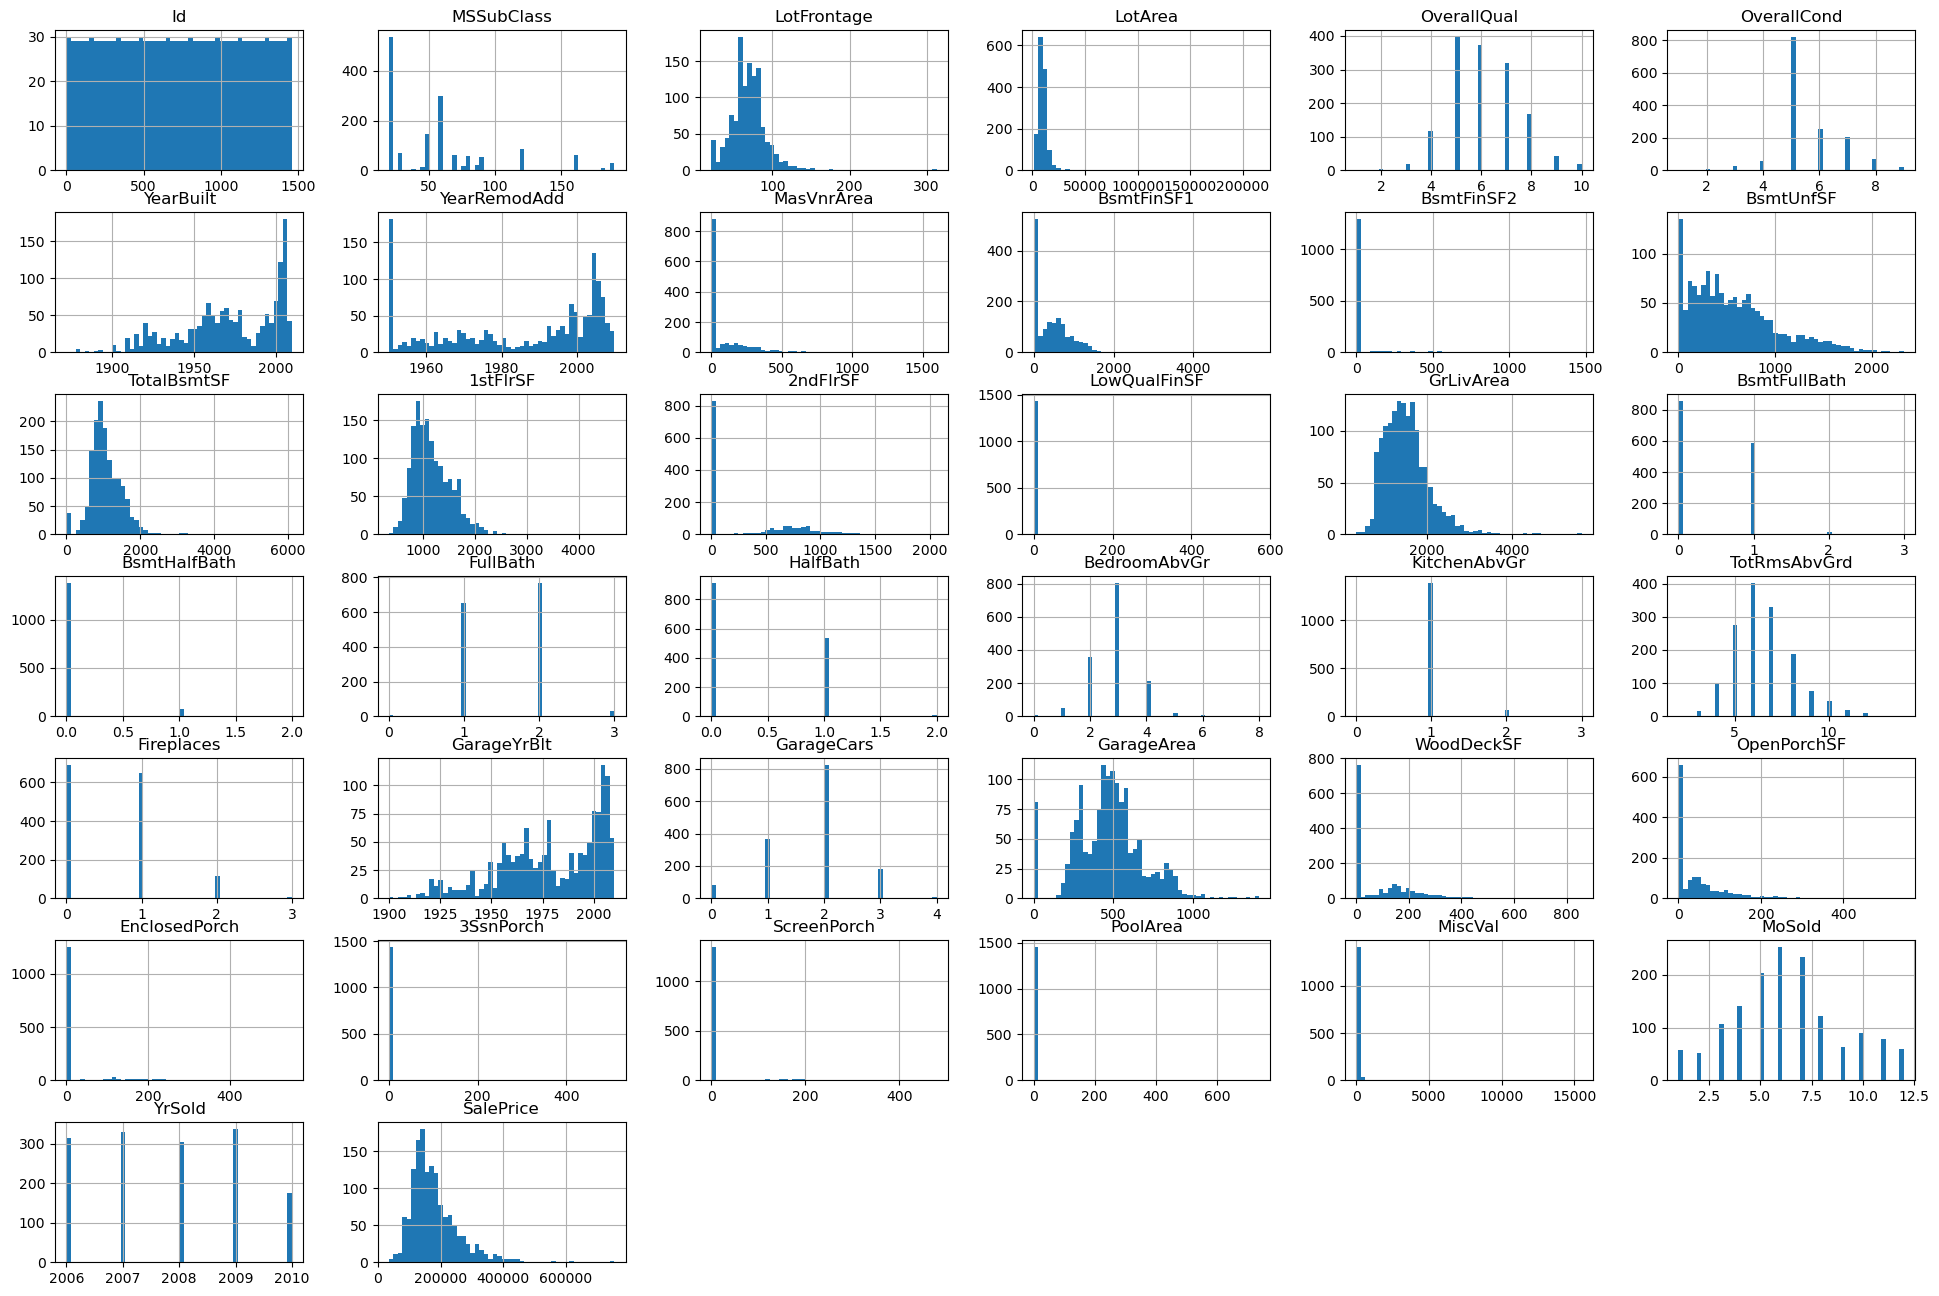

In [13]:
train.hist(bins = 50, figsize = (24,16))
plt.show()

### Rozkład zmiennej docelowej

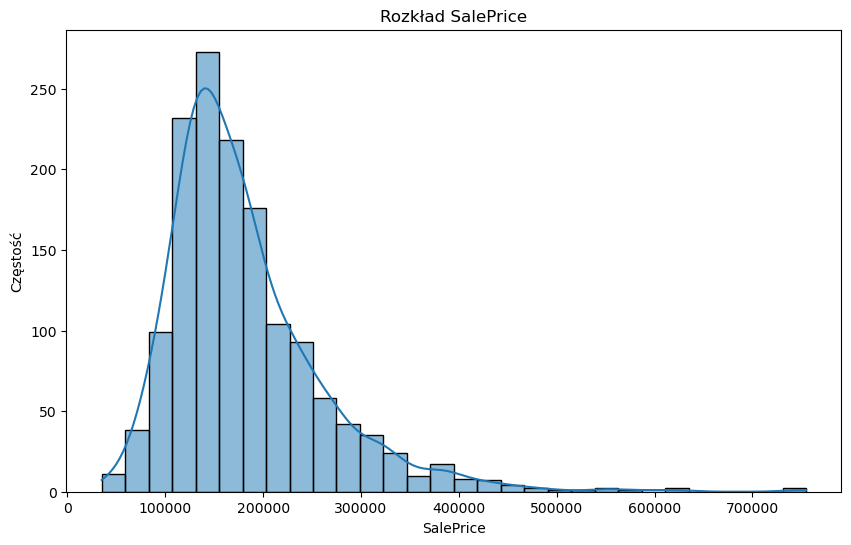

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(train['SalePrice'],kde = True, bins= 30)
plt.title('Rozkład SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Częstość')
plt.show()

Wnioski

- Rozkład jest prawostronnie asymetryczny (prawoskośny), co oznacza ze wieksza  cześć danych koncentruje sie w niższych wartosciach od 100 000 do 250 000
- Rozkład jest jednomodalny poniewaz posiada jeden wyraźny szczyt w okolicach wartości 150 000- 200 000, oznacza to ze większość cen domów w zbiorze danych mieści sie w tym przedziale

Asymetryczność ma negaywny wpływ na działanie niekótrych modeli regresji,takich jak regrsja liniowa które zakładaja normalność rozkładu zmiennej docelowej.

<Axes: xlabel='LogSalePrice', ylabel='Count'>

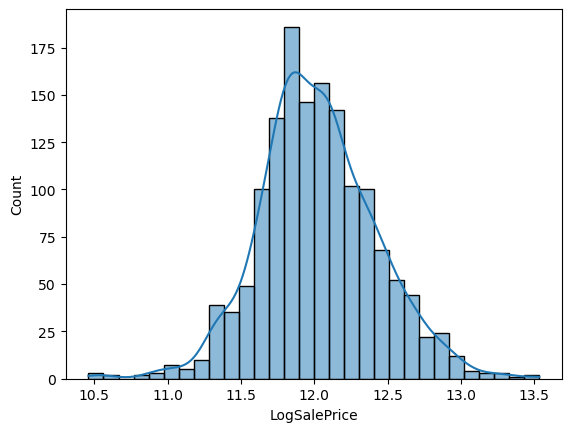

In [15]:
train['LogSalePrice'] = np.log1p(train['SalePrice'])
sns.histplot(train['LogSalePrice'], kde=True, bins=30)

### Wnioski

- Rozład jest bardziej symetryczny i zbliżony do normalnego (rozkładu Gaussa), oznacza to ze dane po transformacji lepiej spełniaja założenia normalnosci co wpłynie korzystniej na algorytmy uczenia maszynowego, takich jak regresja liniowa.
- wysokie ceny, które wczesniej znajdowały sie na prawym koncu rozkładu i wpływaja na asymetrie zostały skompresowane w bardzie zwartej formie przez co ich wpływ na modelowanie jest teraz ograniczony
- dominujacym przedziałem jest 12 co odpowiada rzeczywistej wartosci ceny
- rozkład normalny jest zblizony do normalnego. zastosowanie tej transrmacji poprawi predykcje

Funkcja wykonuje logarytm naturalny (logarytm w podstawie e) dodoając 1 do wartości wejściowej przed wykonaniem logarytmu co pozwala uniknąc błedu logarytmowania wartości 0 (prowadzi do nieskonczoności )

### Relacja między YearBuilt (rok budowy) a SalePrice (cena sprzedaży)

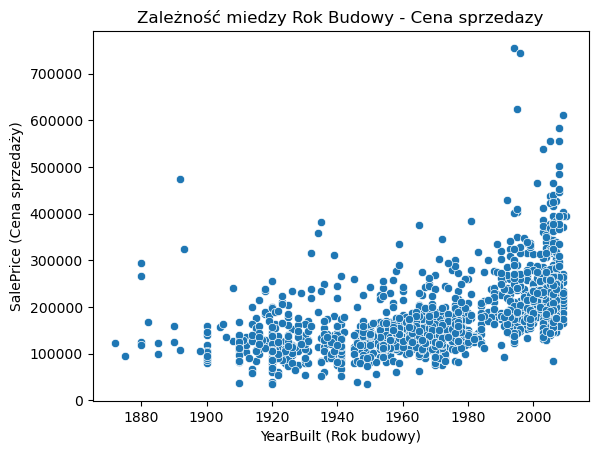

In [16]:
sns.scatterplot(x= train['YearBuilt'],y= train['SalePrice'])
plt.title('Zależność miedzy Rok Budowy - Cena sprzedazy')
plt.xlabel('YearBuilt (Rok budowy)')
plt.ylabel('SalePrice (Cena sprzedaży)')
plt.show()

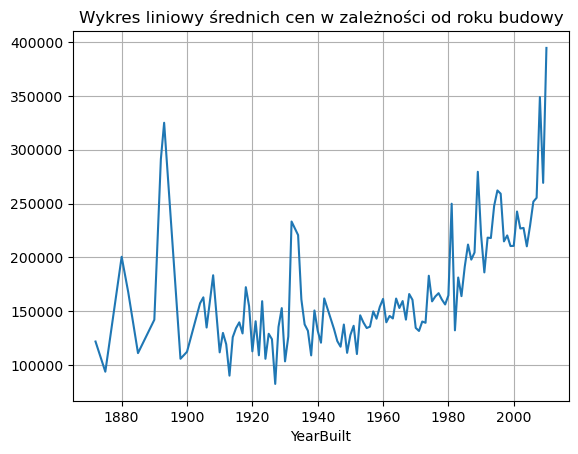

In [17]:
avg_price_by_year = train.groupby('YearBuilt')['SalePrice'].mean()
avg_price_by_year.plot(kind = 'line')
plt.title('Wykres liniowy średnich cen w zależności od roku budowy')
plt.grid()
plt.show()

### Wnioski
- Ceny domow maja ogolną tendencje wzrostową 
- Ceny domów w okolicach roku 2000 rosna co jest logiczne poniewaz nowsze budynki zwykle mają lepsze standardy 
- Najwiecej domów zostało zbudowanych miedzy 1950 - 2000 co zoznacza ze był to okres intensywnego rozwoju budowlanego
- Istnieje kilka wyjątków:
    - kilka domów zdudowanych miedzy 1880-1900 które przekraczaja cene 300 000 co oznacza ze domy te maja jakas wartosc historyczna
    - kilka domow zbudowanych po 2000 jest bardzo drogich (powyżej 700 000) co oznacza ze to luksusowe rezydencje 

<function matplotlib.pyplot.title(label: 'str', fontdict: 'dict[str, Any] | None' = None, loc: "Literal['left', 'center', 'right'] | None" = None, pad: 'float | None' = None, *, y: 'float | None' = None, **kwargs) -> 'Text'>

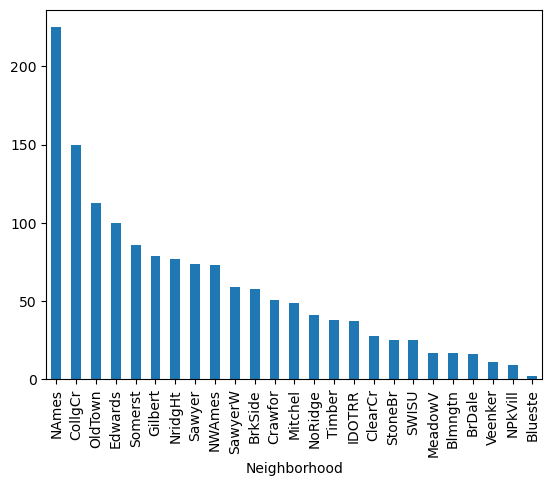

In [18]:
train['Neighborhood'].value_counts().plot(kind= 'bar')
plt.title 

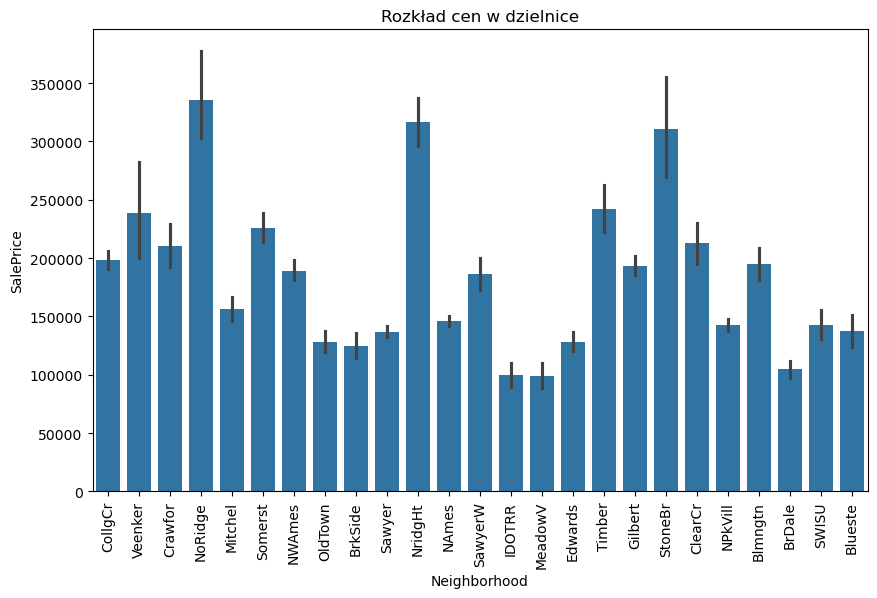

In [19]:
plt.figure(figsize= (10,6))
sns.barplot(x= train['Neighborhood'],y=train['SalePrice'])
plt.title('Rozkład cen w dzielnice')
plt.xticks(rotation=90)
plt.show()

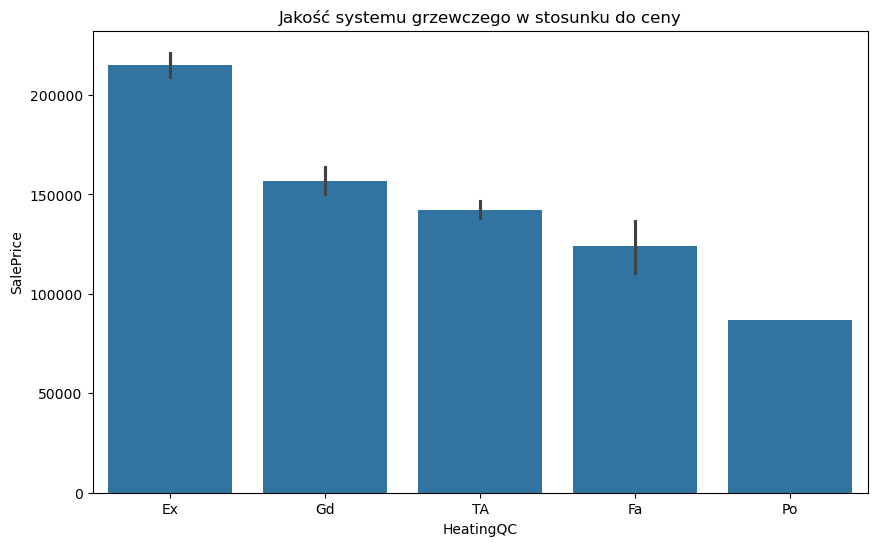

In [20]:
plt.figure(figsize= (10,6))
sns.barplot(x= train['HeatingQC'],y=train['SalePrice'])
plt.title('Jakość systemu grzewczego w stosunku do ceny')
plt.show()


## Wykres braków

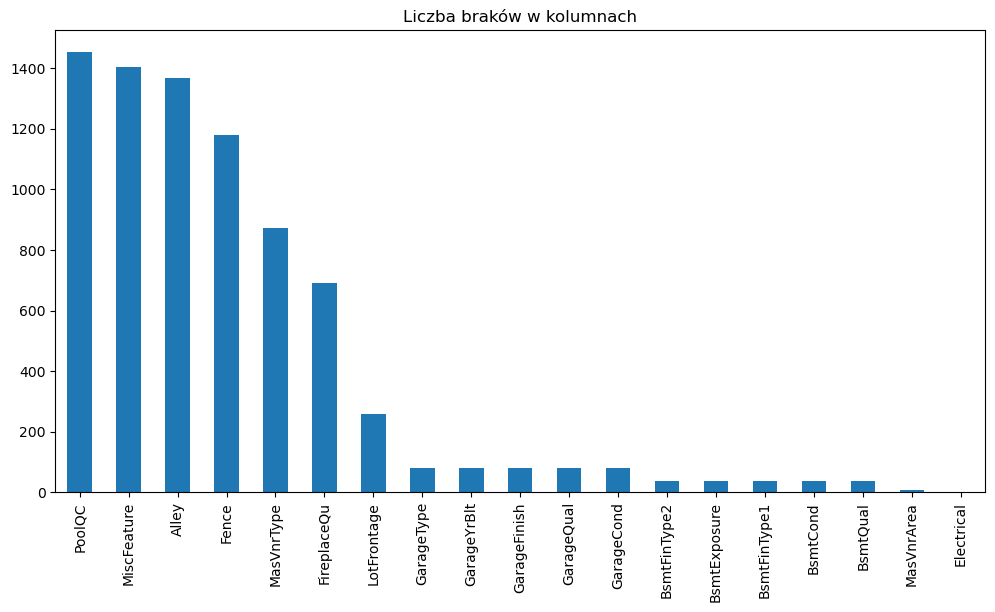

In [21]:
missing_values.plot(kind= 'bar',figsize= (12,6))
plt.title('Liczba braków w kolumnach')
plt.show()

## Wnioski 
Kolumny po lewej stronie wykresu mają najwiecej braków a im dalej w prawo, tym liczba braków maleje. 

Niektóre kolumny maja bardzo dużą liczbe braków, rozważe ich usuniecie.

## Przygotowywanie danych

#### Kolumna PoolQC
odnosi sie do jakosci basenu w domach, jest tylko 7 watosci poniewaz w 7 domach sa tylko baseny. Oznacza to ze posiadanie basenów jest bardzo rzadkie i moze byc cechą charakterystyczna dla luksusowych nieruchomości. Warto bedzie przeprowadzic analize jak posiadanie basenu wpływa na cene

Zamierzam wypełnic puste wartosci a nastepnie zakodowac jako zmienna numeryczna aby uwzglednic ja w  modelu.
- Gd good
- Ex Excellent
- Fa fair

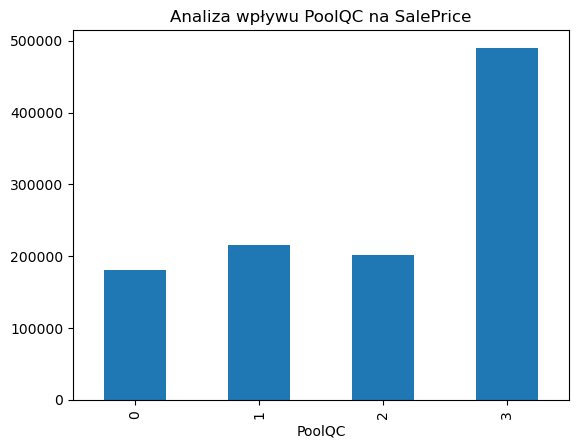

In [32]:
train.groupby('PoolQC')['SalePrice'].mean().plot(kind= 'bar')
plt.title('Analiza wpływu PoolQC na SalePrice')
plt.show()

In [26]:
train['PoolQC'].fillna('None',inplace= True)


In [27]:
pool_guality= {'None': 0, 'Fa': 1, 'Gd': 2, 'Ex': 3}
train['PoolQC'] = train['PoolQC'].map(pool_guality) 

In [28]:
train['PoolQC'].value_counts()

PoolQC
0    1453
2       3
3       2
1       2
Name: count, dtype: int64

#### kolumna MiscFeature
Zawiera informacje o dodatkowych cechach nieruchomości kóre nie sa opisane w innych kolumnach, 

Zamierzam wypełnic braki i zakodowac kolumne na wartosci numeryczne

- Shed schowek,szopa
- Gar2 garage 2
- othr other
- TenC Tennis Court


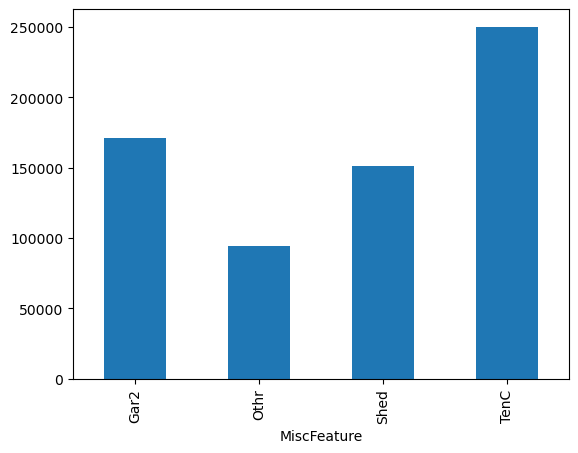

In [30]:
train.groupby('MiscFeature')['SalePrice'].mean().plot(kind= 'bar');

In [33]:
train['MiscFeature']= train['MiscFeature'].fillna('None')

In [35]:
micsfeature_mapping = {'None':0, 'Shed':1,'Gar2':2,'Othr':3,'TenC':4}
train['MiscFeature']= train['MiscFeature'].map(micsfeature_mapping)

In [36]:
train['MiscFeature'].value_counts()

MiscFeature
0    1406
1      49
2       2
3       2
4       1
Name: count, dtype: int64

In [22]:
X = train.drop(['LogSalePrice','SalePrice'], axis =1)
y = train['LogSalePrice']

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [29]:
'MSZoning','Street'         
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType         objec
SaleCondition 


MiscFeature
Shed    49
Gar2     2
Othr     2
TenC     1
Name: count, dtype: int64

### Walidacja danych: Podział na zestawy treningowe i walidacyjne

Zmienna docelowa po zlogarytmowanu przypomina rozkład normalny dlatego moim wyborem jest walidacja danych za pomocą Kfold która dobrze sprawdza sie w problemach regresji

In [20]:
from sklearn.model_selection import KFold

kf = KFold(n_splits = 5)

for train_index, val_index in kf.split(X,y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    

SyntaxError: expected ':' (1735023254.py, line 5)